# HW1: Bayesian Linear Regression


**STATS271/371: Applied Bayesian Statistics**

_Stanford University. Winter, 2021._

---

**Name:** Eric Weiner

**Names of any collaborators:** _Names here_

*Due: 11:59pm Friday, April 9, 2021 via GradeScope*

---

In this homework assignment you'll perform a Bayesian linear regression. As a quick recap of lecture, we have the following notation:

- Data:
 - $\mathbf{x}_n \in \mathbb{R}^P$ feature/covariates for the $n$-th datapoint
 - $y_n \in \mathbb{R}$ observation for the $n$-th datapoint
- Parameters:
 - $\mathbf{w} \in \mathbb{R}^P$  weights
 - $\sigma^2$ observation/noise variance
- Hyperparameters
 - $\nu, \tau^2$, degrees of freedom and scaling parameter of the inverse chi-squared prior on variance
 - $\boldsymbol{\mu} \in \mathbb{R}^P$ mean vector
 - $\mathbf{\Lambda} \in \mathbb{R}_{\succ 0}^{P \times P}$ positive definite precision matrix

The probabilistic model is as follows,
\begin{align}
p( \{y_n \}_{n=1}^N, \mathbf{w}, \sigma^2 \mid \{\mathbf{x}_n\}_{n=1}^N) 
&= p(\mathbf{w}, \sigma^2) \prod_{n=1}^N p(y_n \mid \mathbf{w}, \sigma^2, \mathbf{x}_n) \\
&= \mathrm{Inv-}\chi^2(\sigma^2 \mid \nu, \tau^2) \, \mathcal{N}(\mathbf{w} \mid \boldsymbol{\mu}, \sigma^2 \mathbf{\Lambda}^{-1}) 
\prod_{n=1}^N \mathcal{N}(y_n \mid \mathbf{w}^\top \mathbf{x}_n, \sigma^2).
\end{align}

Under this model, the posterior distribution $p(\mathbf{w}, \sigma^2 \mid \{y_n, \mathbf{x}_n\}_{n=1}^N)$ is available in closed form, as the prior is conjugate to the likelihood.

Follow the instructions below to compute the posterior distribution and perform the specified analyses. Specifically, we will be performing polynomial regression and recreating plots per the slides of **Lap 1: Bayesian Linear Regression**

In [4]:
import wget

In [5]:
wget.download('https://raw.githubusercontent.com/slinderman/stats271sp2021/main/assignments/hw1.csv')

'hw1.csv'

In [2]:
import pandas as pd
df = pd.read_csv('hw1.csv')
df

,us,ys
0,1.764052,0.930890
1,0.400157,0.147197
2,0.978738,-0.123841
3,2.240893,1.397427
4,1.867558,0.440510
5,-0.977278,-3.253773
6,0.950088,0.276898
7,-0.151357,-0.719139
8,-0.103219,-1.474301
9,0.410598,0.545476


## Problem 1: Plot the data

Recreate the plot from page 7 of the slides

Text(0, 0.5, 'y')

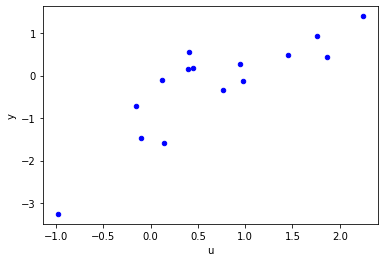

In [348]:
import matplotlib.pyplot as plt
df.plot.scatter(x ='us',
                      y='ys',
                      c='Blue')
plt.xlabel('u')
plt.ylabel('y')

## Problem 2: Compute and print the sufficient statistics of the data

Using covariates for a polynomial regression of degree 1 (letting the features $\mathbf{x}_n = (1, u_n)^\top$, calculate and print out the sufficient statistics (per slide 8).

In [333]:
import numpy as np
##calculating sufficienct statistic sum (y^2)
sum_y2 = sum((df["ys"]**2))
print(f"The sum of the squared response variables is {sum_y2}")

##calculating second sufficient statistic
ys = np.asarray(df[['ys']])
us = np.asarray(df[['us']])
ones = np.ones((15,1))
xs = np.concatenate((ones, us), axis =1)
sec_suf = sum(np.multiply(ys, xs))

print(f"The second sufficient statistic is {sec_suf}")


##calculating the third sufficient statistic

third_suf = np.dot(xs.T, xs)
np.shape(third_suf)
print(f"The third sufficient statistic is {third_suf}")



The sum of the squared response variables is 19.5913938051062
The second sufficient statistic is [-3.204591    9.74031843]
The third sufficient statistic is [[15.         10.3051246 ]
 [10.3051246  17.72586162]]


## Problem 3: Compute and print the posterior parameters $\nu'$, $\tau'^2$, $\boldsymbol{\mu}'$, and $\mathbf{\Lambda}'$

Assume that our prior parameters $\nu = \tau^2 = \boldsymbol{\mu} = \mathbf{\Lambda} = 0$. 

In [334]:
##declaration of initial variables
nu_0 = 0
prec_0 = 0
mu_0 = np.zeros((2,1))
lambda_0 = np.zeros((2,2))
sec_suf = np.reshape(sec_suf, (2,1))
## nu prime
N = len(ys)
nu_prime = nu_0 + N

print(f"nu prime is {nu_prime}")
## lambda prime

lambda_prime = lambda_0 + third_suf

print(f"lambda prime is {lambda_prime}")


## mu prime 

def mu_pr(lam_pr, lam, mu, sec_suff):
    return np.dot(np.linalg.inv(lam_pr),np.dot(lam, mu) + sec_suff)

mu_prime  = mu_pr(lambda_prime, lambda_0, mu_0, sec_suf)
print(f"mu prime is {mu_prime}")


## tau prime squared

def tau_prsq(nu_pr, nu, tau, mu, lam, first_suff, mu_pr, lam_pr):
    return 1/nu_pr*(nu*(tau**2)+ np.dot(np.dot(mu.T, lam), mu) + first_suff - 
                    np.dot(np.dot(mu_pr.T, lam_pr), mu_pr))

tau_prime_sq  = tau_prsq(nu_prime, nu_0, prec_0, mu_0, lambda_0, 
                         np.reshape(sum_y2, (1,1)), mu_prime, lambda_prime)
print(f"tau prime squared is {tau_prime_sq}")

nu prime is 15
lambda prime is [[15.         10.3051246 ]
 [10.3051246  17.72586162]]
mu prime is [[-0.98426349]
 [ 1.12171001]]
tau prime squared is [[0.36742795]]


## Problem 4a: Plot the posterior of $\sigma^2$

(Recreate the plot from slide 25)

We know that $\tau '^{2}$ can be modeled plotted as an inverse gamma function with shape $\frac{\nu '}{2}$ parameter and scale parameter $\frac{\nu ' \tau ` ^{2}}{2}$.

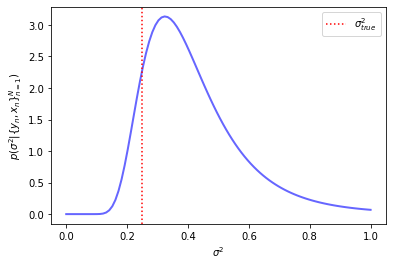

In [118]:
from scipy.stats import invgamma

fig, ax = plt.subplots(1, 1)
a= nu_prime/2
beta = nu_prime*tau_prime_sq/2   
x = np.linspace(0,1, 100)

ax.plot(np.reshape(x, (100,1)), np.reshape(invgamma.pdf(x, a, loc = 0, scale = beta), (100,1)),
         'b-', lw=2, alpha=0.6, label='_nolegend_')
ax.set_xlabel(r'$\sigma^2$')
ax.set_ylabel(r'$p(\sigma^2 |\{y_n, x_n\}_{n=1}^N)$')
ax.axvline(x = 0.25, color ='r', linestyle = ":")
ax.legend([r'$\sigma_{true}^2$'])


## Problem 4b: Plot the posterior of $\mathbf{w}$ for $\sigma^2 \in \{0.2, 0.4, 0.6\}$

(Recreate the figures from slide 26)


In [206]:
from scipy.stats import multivariate_normal
x, y = np.mgrid[-1.6:-0.49:.01, 0.49:1.6:.01]
pos = np.dstack((x, y))

inv_lam_sig = 0.2*np.linalg.inv(lambda_prime)
rv_pttwo = multivariate_normal([-0.98426349,1.12171001], 
                               [[inv_lam_sig[0,0] , inv_lam_sig[0,1]], 
                                                              [inv_lam_sig[1,0], inv_lam_sig[1,1]]])

ax1.contourf(x, y, rv_pttwo.pdf(pos))

inv_lam_sig = 0.4*np.linalg.inv(lambda_prime)
rv_ptfour = multivariate_normal([-0.98426349,1.12171001], 
                                [[inv_lam_sig[0,0] , inv_lam_sig[0,1]], 
                                                              [inv_lam_sig[1,0], inv_lam_sig[1,1]]])
ax2.contourf(x, y, rv_ptfour.pdf(pos))

inv_lam_sig = 0.6*np.linalg.inv(lambda_prime)
rv_ptsix = multivariate_normal([-0.98426349,1.12171001], 
                               [[inv_lam_sig[0,0] , inv_lam_sig[0,1]], 
                                                              [inv_lam_sig[1,0], inv_lam_sig[1,1]]])
ax3.contourf(x, y, rv_ptsix.pdf(pos))



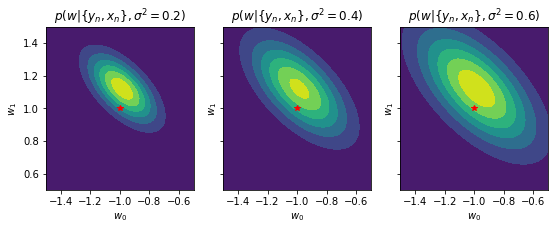

In [208]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey= True,figsize=(9, 3))

x_ind = np.array([-1.4, -1.2, -1.0, -0.8, -0.6])
y_ind = np.array([0.6, 0.8, 1.0, 1.2, 1.4])

ax1.set_xlabel(r'$w_0$')
ax1.set_ylabel(r'$w_1$')
ax1.set_xticks(x_ind)
ax1.set_yticks(y_ind)
ax1.set_xlim([-1.5, -0.5])
ax1.set_ylim([0.5, 1.5])

ax2.set_xlabel(r'$w_0$')
ax2.set_ylabel(r'$w_1$')
ax2.set_xticks(x_ind)
ax2.set_xlim([-1.5, -0.5])

ax3.set_xlabel(r'$w_0$')
ax3.set_ylabel(r'$w_1$')
ax3.set_xticks(x_ind)
ax3.set_xlim([-1.5, -0.5])

ax1.title.set_text(r'$p(w |\{y_n, x_n\}, \sigma^2 = 0.2)$')
ax2.title.set_text(r'$p(w |\{y_n, x_n\}, \sigma^2 = 0.4)$')
ax3.title.set_text(r'$p(w |\{y_n, x_n\}, \sigma^2 = 0.6)$')

ax1.plot(-1,1, "*", color = "red")
ax2.plot(-1,1, "*", color = "red")
ax3.plot(-1,1, "*", color = "red")
ax1.contourf(x, y, rv_pttwo.pdf(pos))
ax2.contourf(x, y, rv_ptfour.pdf(pos))
ax3.contourf(x, y, rv_ptsix.pdf(pos))

## Problem 5: Compute the log marginal likelihood $p(\{y_n\} | \{\mathbf{x}_n\})$

Compare the log marginal likelihood with covariates $x_n = (u_n^0, \ldots, u_n^{P-1})$ for $P=0,\ldots,4$. Use the following prior parameters:
- $\nu = 0.01$
- $\tau^2 = 0.01$
- $\mathbf{\mu} = (0, \ldots, 0)^\top$
- $\mathbf{\Lambda} = 0.01 I$

To recapitulate the plot (slide 33) from lecture, divide the marginal likelihood by $N$ to get the average log marginal likelihood per datapoint.

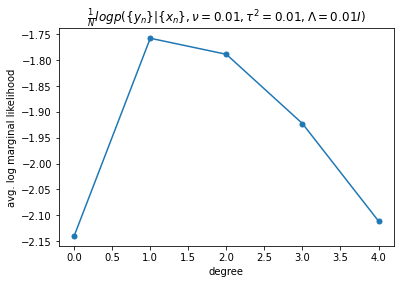

In [349]:
from scipy.special import gamma, factorial
import math
from math import pi,cos,sin,tan,atan

nu_0 = 0.01
tau_sq = 0.01
nu_prime = nu_0 + N
likelihoods = []
p = range(5)
xs_test = np.concatenate((us**0, us**1, us**2, us**3, us**4), axis =1)

for i in p:
    third_suf = np.dot(xs_test[:,:i+1].T, xs_test[:,:i+1])
    lambda_0 = 0.01*np.identity(i+1)
    lambda_prime = lambda_0 + third_suf
    
    mu_0 = np.zeros((i+1,1))
    sec_suf = np.reshape(sum(np.multiply(ys, xs_test[:,:i+1])), (i+1,1))
    mu_prime  = mu_pr(lambda_prime, lambda_0, mu_0, sec_suf)
    tau_prime_sq  = tau_prsq(nu_prime, nu_0, tau_sq, mu_0, lambda_0, 
                         np.reshape(sum_y2, (1,1)), mu_prime, lambda_prime)
    
    first = (gamma(nu_prime/2))/(gamma(nu/2))
    second = ((tau_sq*nu_0/2)**(nu_0/2))/((tau_prime_sq*nu_prime/2)**(nu_prime/2))
            
    a = np.linalg.det(lambda_0)**(1/2)
    b = np.linalg.det(lambda_prime)**(1/2)
    third = a/b
              
    lh = (2*pi)**(-N/2)*first*second*third
    likelihoods.append(lh)
    
   
    #print(f"for degree {i}, nu prime is {nu_prime}")
    #print(f"for degree {i}, lambda prime is {lambda_prime}")
    #print(f"for degree {i}, mu prime is {mu_prime}")
    #print(f"for degree {i}, tau prime squared is {tau_prime_sq}")
likelihoods_graph = np.reshape(np.log(likelihoods)/N, (5,1))

plt.plot([0,1,2,3,4], likelihoods_graph, marker = ".",markersize=10)
plt.title(r'$\frac{1}{N}logp(\{y_n\} |\{x_n\}, \nu = 0.01, \tau^2 = 0.01, \Lambda = 0.01I)$')
plt.xlabel('degree')
plt.ylabel('avg. log marginal likelihood')
plt.show()

We can see that the marginal likelihood of the data is maximum at 1 and slightly less at degree 2. This would lead us to believe that either a linear or quadratic transformation of the features would help us examine the true relationship between the ys and us.

# Submission Instructions


**Formatting:** check that your code does not exceed 80 characters in line width. If you're working in Colab, you can set _Tools &rarr; Settings &rarr; Editor &rarr; Vertical ruler column_ to 80 to see when you've exceeded the limit. 

Download your notebook in .ipynb format and use the following commands to convert it to PDF:
```
jupyter nbconvert --to pdf hw1_yourname.ipynb
```

**Dependencies:**

- `nbconvert`: If you're using Anaconda for package management, 
```
conda install -c anaconda nbconvert
```

**Upload** your .ipynb and .pdf files to Gradescope. 
